In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv(r"C:\Users\musta\Downloads\datasets\Credit card dataset\train.csv")

In [3]:
data.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [4]:
data.nunique()

ID                     245725
Gender                      2
Age                        63
Region_Code                35
Occupation                  4
Channel_Code                4
Vintage                    66
Credit_Product              2
Avg_Account_Balance    135292
Is_Active                   2
Is_Lead                     2
dtype: int64

In [5]:
 data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [6]:
data.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


In [7]:
data.isna().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [8]:
data['Credit_Product'].fillna(data['Credit_Product'].mode()[0],inplace=True)

In [9]:
data.isna().sum()

ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64

In [10]:
     data.dtypes
    

ID                     object
Gender                 object
Age                     int64
Region_Code            object
Occupation             object
Channel_Code           object
Vintage                 int64
Credit_Product         object
Avg_Account_Balance     int64
Is_Active              object
Is_Lead                 int64
dtype: object

# Univariate Analysis

**AGE**

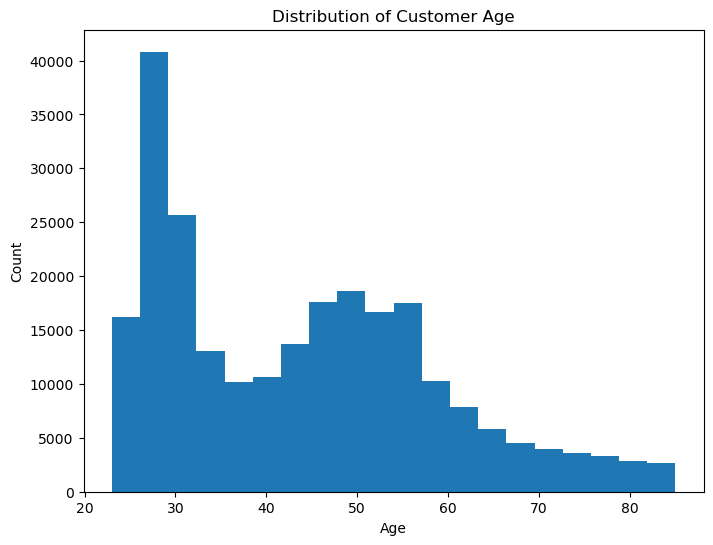

In [11]:
# Plot the histogram of age distribution
plt.figure(figsize=(8, 6))
plt.hist(data['Age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Customer Age')
plt.show()




**Channel Code**

Text(0.5, 0, 'Channel_code')

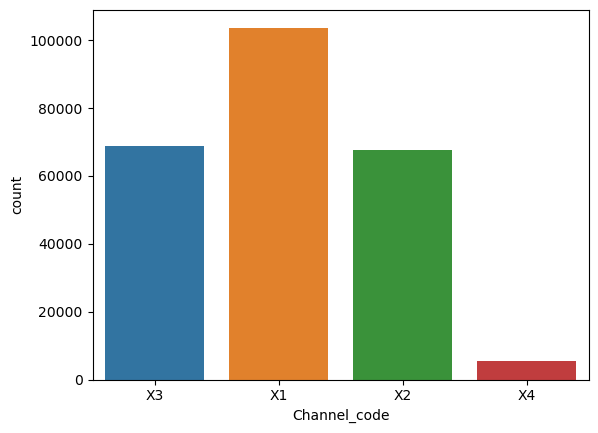

In [12]:
sns.countplot(data = data, x = 'Channel_Code')
plt.xlabel('Channel_code')


**Credit Product**

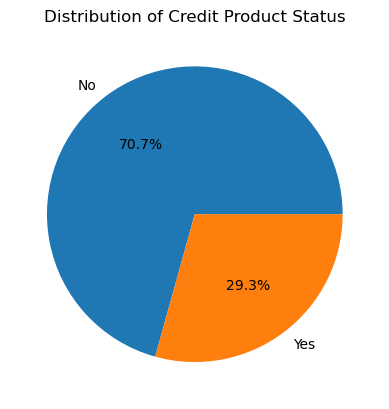

In [13]:
credit_product_counts = data['Credit_Product'].value_counts()
plt.pie(credit_product_counts.values, labels=credit_product_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Credit Product Status')
plt.show()



# Bivariate Analysis

**1. AGE**

Gender  Female   Male
Age                  
20-24     4188   3025
25-29    34700  26227
30-34    14680  12987
35-39     7789   9273
40-44     9503  13674
45-49    11903  18747
50-54     9525  16401
55-59     6282  12223
60-64     4052   7927
65-69     2689   4963
70-74     2452   3698
75+       2223   3093


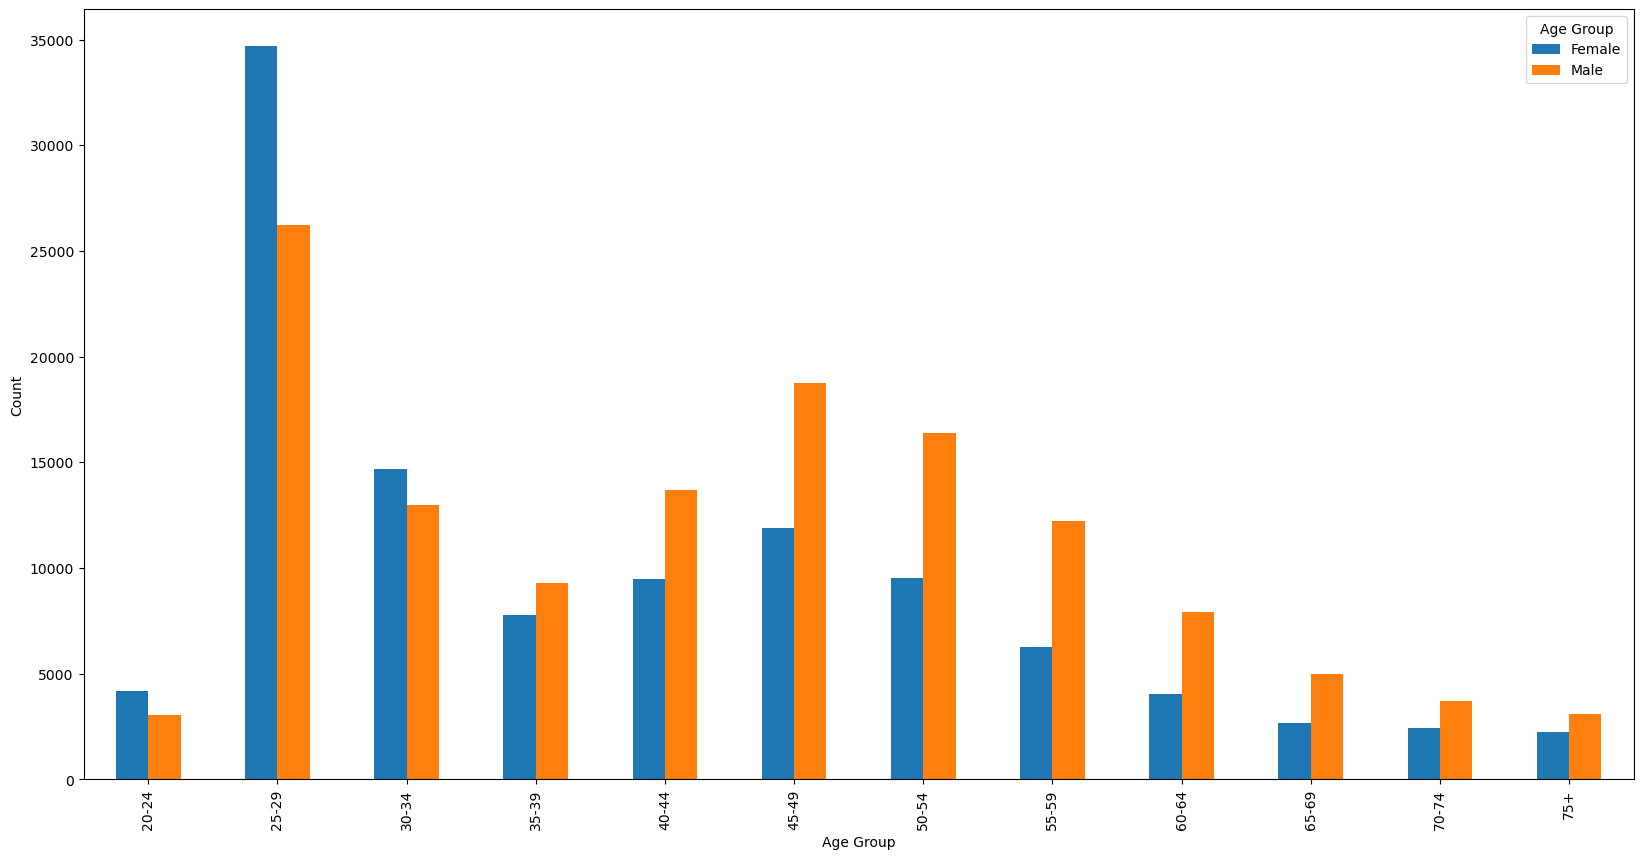

In [14]:
#Age vs Gender
age_groups = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75+']

# Create a contingency table with age groups
contingency_table = pd.crosstab(pd.cut(data['Age'], bins=range(0, 81, 5), labels=age_groups), data['Gender'])

print(contingency_table)

# Plot the contingency table
contingency_table.plot(kind='bar', figsize=(20, 10))
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Age Group')
plt.show()

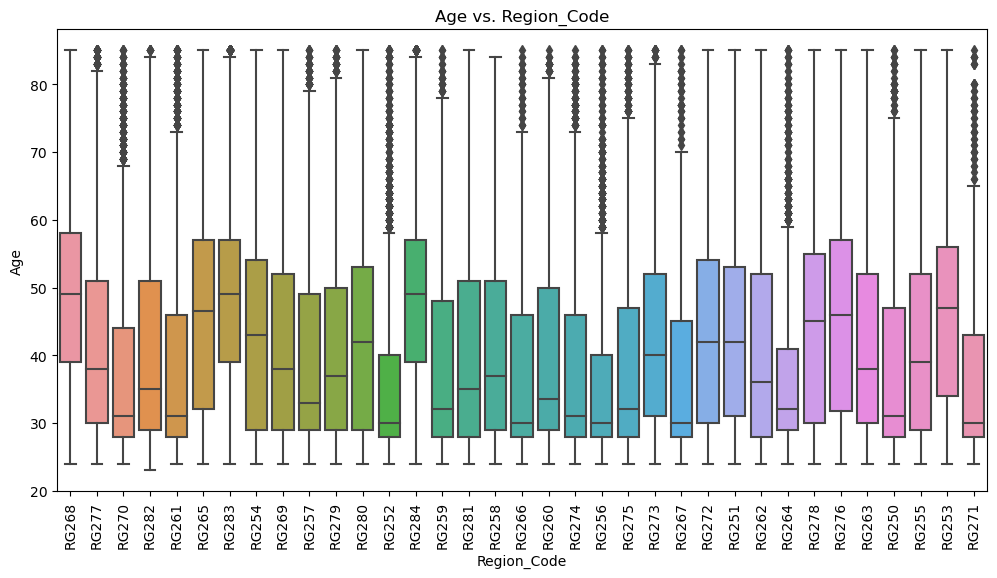

In [15]:
#Age vs Region code
plt.figure(figsize=(12, 6))
sns.boxplot(x=data['Region_Code'], y=data['Age'])
plt.title('Age vs. Region_Code')
plt.xlabel('Region_Code')
plt.ylabel('Age')
plt.xticks(rotation=90)
plt.show()

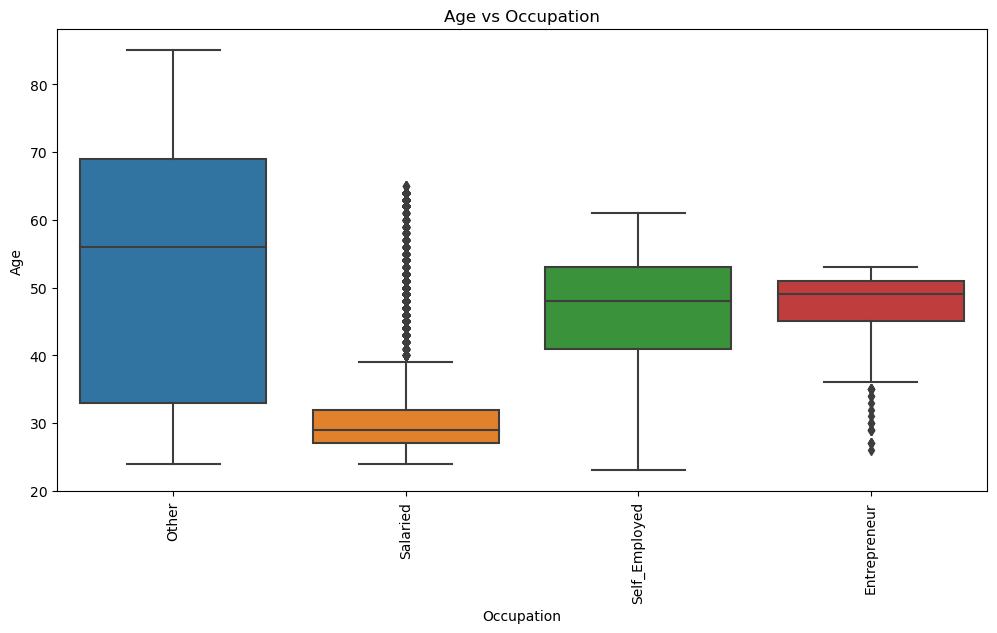

In [16]:
# Age vs Occupation
plt.figure(figsize=(12, 6))
sns.boxplot(x=data['Occupation'], y=data['Age'])
plt.title('Age vs Occupation')
plt.xlabel('Occupation')
plt.ylabel('Age')
plt.xticks(rotation=90)
plt.show()

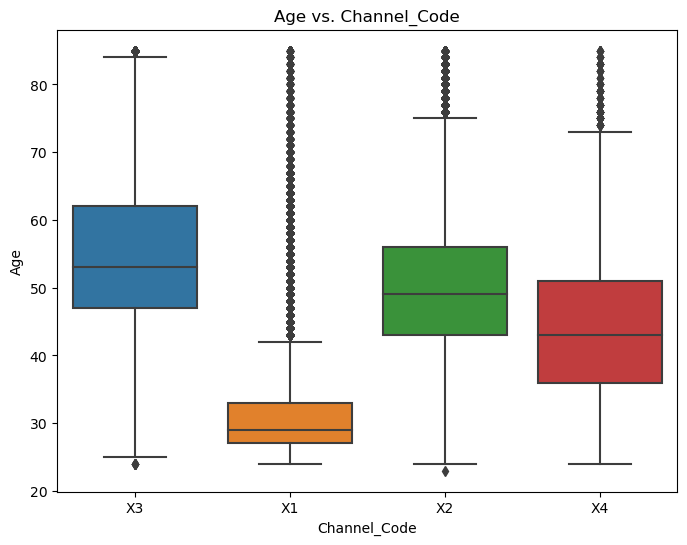

In [17]:
#Age vs Channel code
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Channel_Code'], y=data['Age'])
plt.title('Age vs. Channel_Code')
plt.xlabel('Channel_Code')
plt.ylabel('Age')
plt.show()

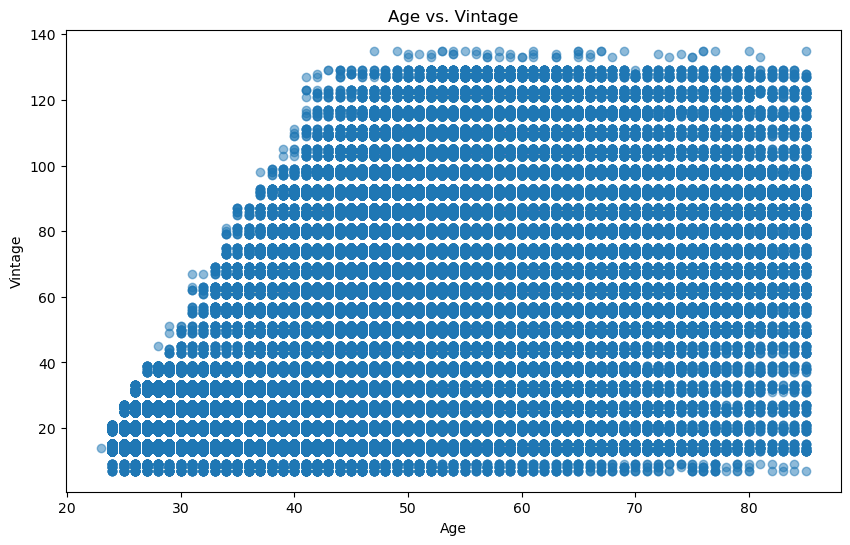

In [18]:
#Age vs Vinatge
plt.figure(figsize=(10, 6))
plt.scatter(data['Age'], data['Vintage'], alpha=0.5)
plt.title('Age vs. Vintage')
plt.xlabel('Age')
plt.ylabel('Vintage')
plt.show()



Is_Active     No    Yes
Age                    
20-24       4872   2341
25-29      48100  12827
30-34      21184   6483
35-39       9934   7128
40-44      11640  11537
45-49      14989  15661
50-54      12570  13356
55-59       9329   9176
60-64       6145   5834
65-69       3916   3736
70-74       3152   2998
75+         2706   2610


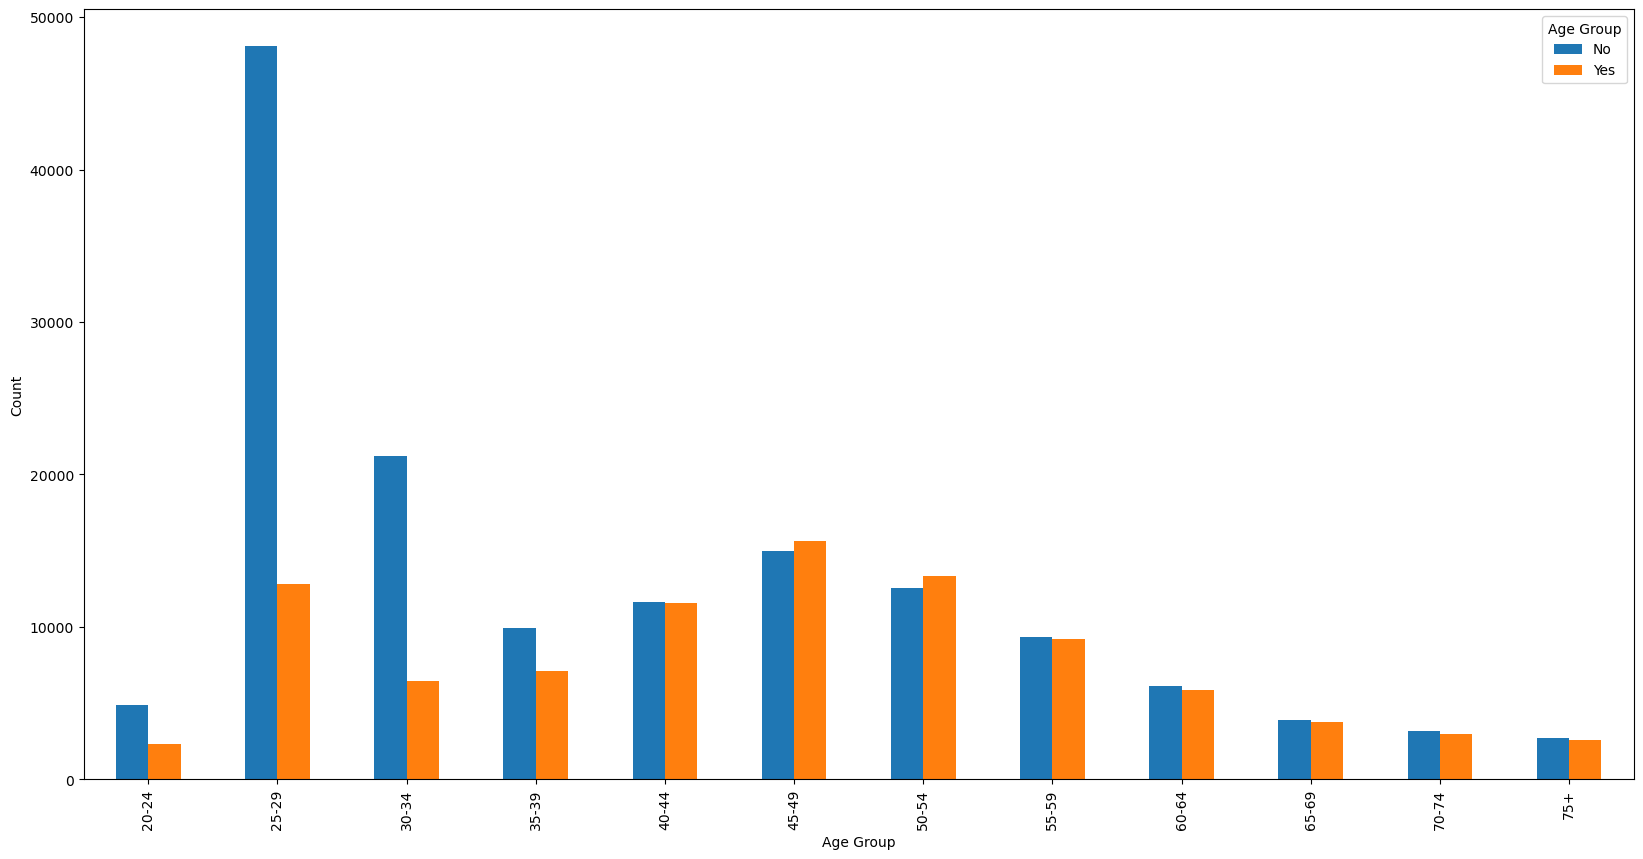

In [19]:
# Age Vs Credit_Product

age_groups = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75+']

# Create a contingency table with age groups
contingency_table = pd.crosstab(pd.cut(data['Age'], bins=range(0, 81, 5), labels=age_groups), data['Is_Active'])

print(contingency_table)

# Plot the contingency table
contingency_table.plot(kind='bar', figsize=(20, 10))
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Age Group')
plt.show()

### DOUBT

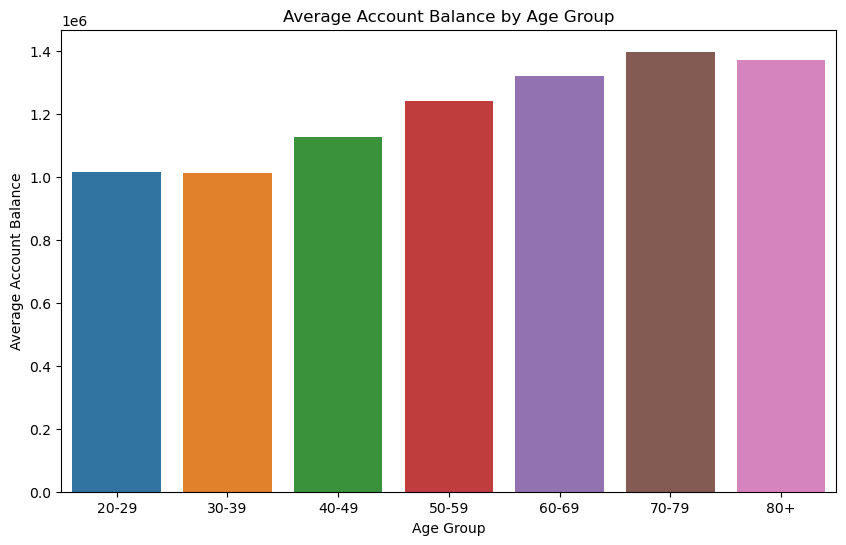

In [20]:
# Age Vs Avgerage account balance
age_bins = [20, 30, 40, 50, 60, 70, 80, np.inf]
age_labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']

# Create a new column for age groups
data['Age_Group'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels)

# Calculate the average account balance for each age group
average_balance_by_age_group = data.groupby('Age_Group')['Avg_Account_Balance'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Age_Group', y='Avg_Account_Balance', data=average_balance_by_age_group)
plt.title('Average Account Balance by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Account Balance')
plt.show()

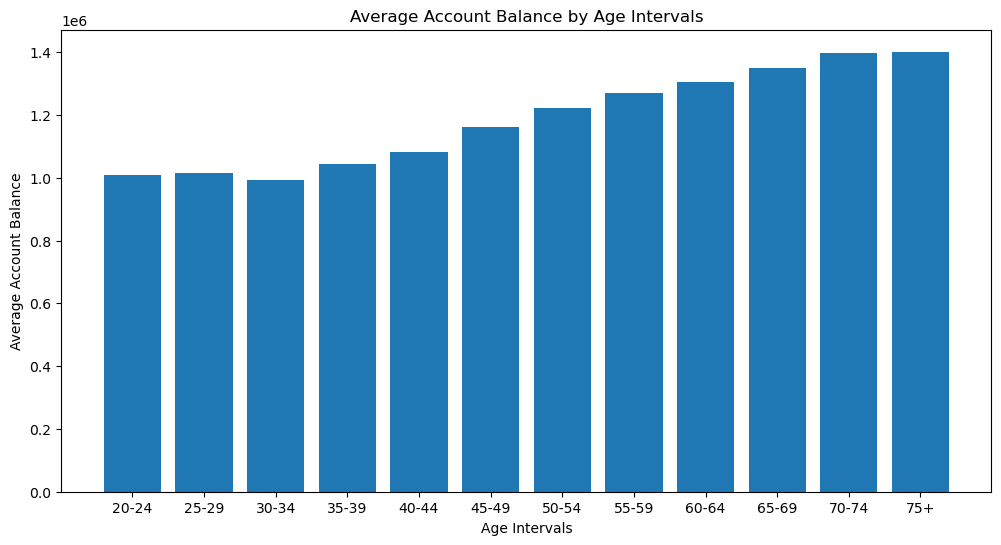

In [21]:
# Age Vs Avgerage account balance

age_intervals = list(range(0, 81, 5))
data['Age_Group'] = pd.cut(data['Age'], bins=age_intervals, labels=age_groups)
average_account_balance_by_age = data.groupby('Age_Group')['Avg_Account_Balance'].mean()

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(average_account_balance_by_age.index, average_account_balance_by_age)
plt.xlabel('Age Intervals')
plt.ylabel('Average Account Balance')
plt.title('Average Account Balance by Age Intervals')
plt.show()

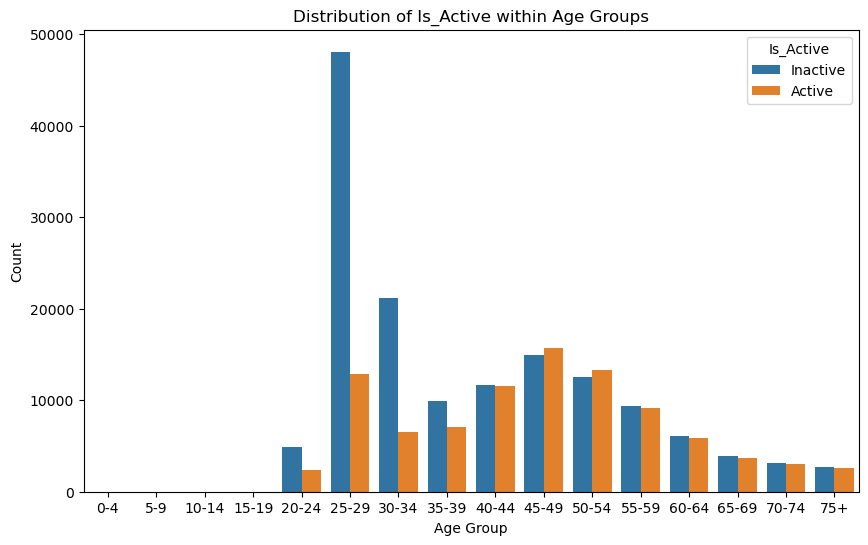

In [22]:
#Age vs Is Active
# Create a bar plot to visualize the distribution of Is_Active within different age groups
plt.figure(figsize=(10, 6))
sns.countplot(x='Age_Group', hue='Is_Active', data=data)
plt.title('Distribution of Is_Active within Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Is_Active', labels=['Inactive', 'Active'])
plt.show()


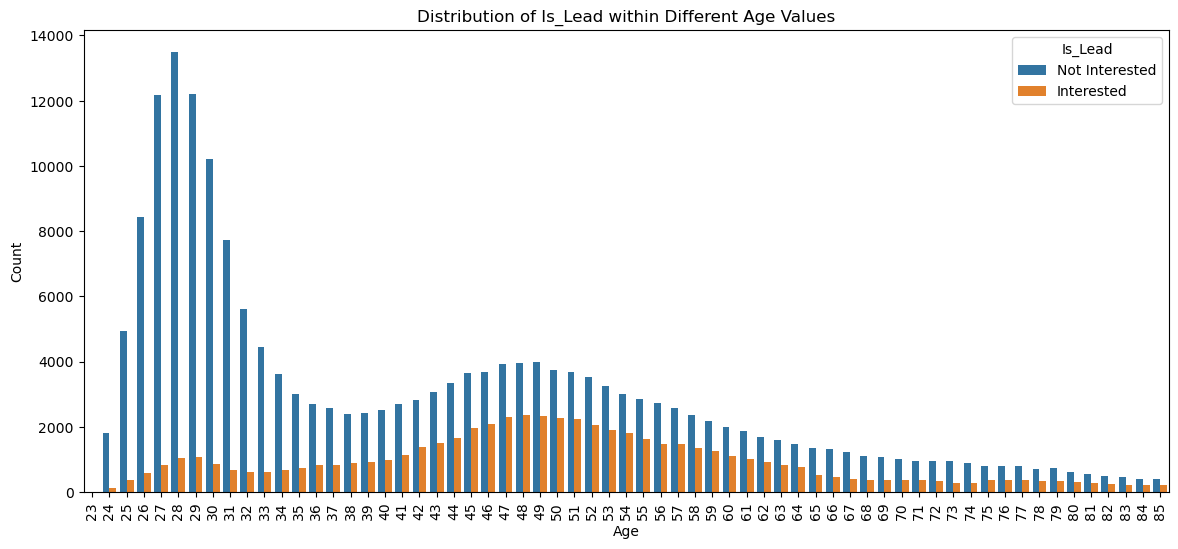

In [23]:
#Age vs is Lead
# Create a bar plot to visualize the distribution of Is_Lead within different age values
plt.figure(figsize=(14, 6))
sns.countplot(x='Age', hue='Is_Lead', data=data)
plt.title('Distribution of Is_Lead within Different Age Values')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Is_Lead', labels=['Not Interested', 'Interested'])
plt.xticks(rotation=90)
plt.show()


**2.CHANNEL CODE**

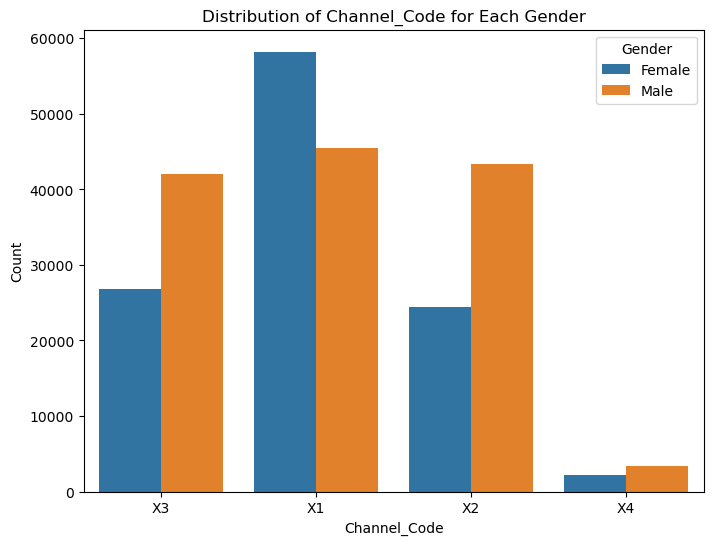

In [24]:
#Channel code vs Gender
# Create a count plot to visualize the distribution of Channel_Code for each Gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Channel_Code', hue='Gender', data=data)
plt.title('Distribution of Channel_Code for Each Gender')
plt.xlabel('Channel_Code')
plt.ylabel('Count')
plt.legend(title='Gender', labels=['Female', 'Male'])
plt.show()


### DOUBT

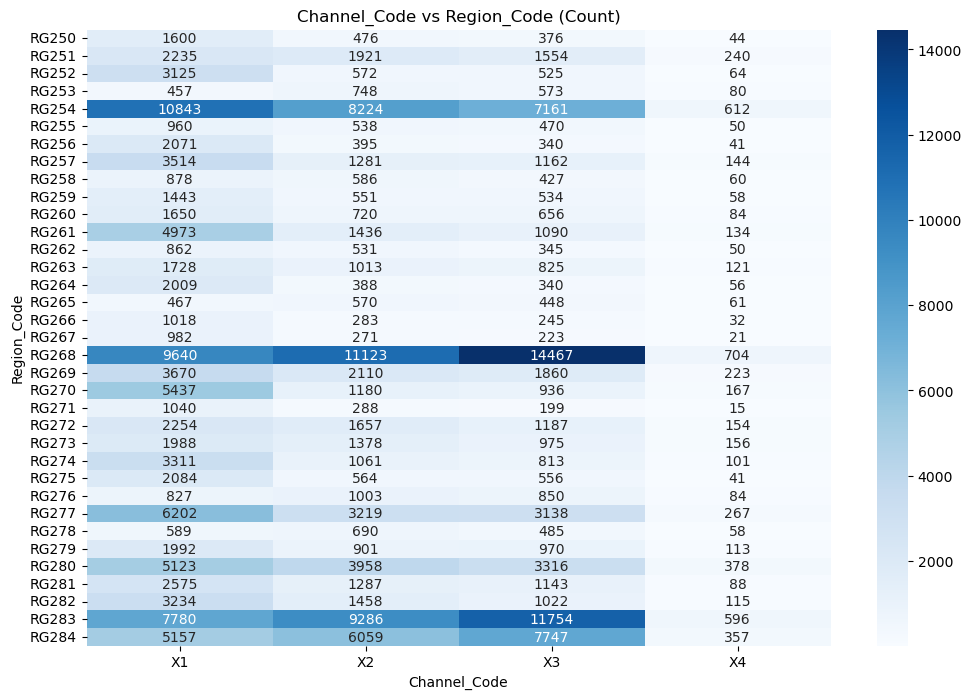

In [25]:
#Channel code vs Region code
# Create a crosstab to show the count distribution of Channel_Code for each Region_Code
cross_tab = pd.crosstab(data['Region_Code'], data['Channel_Code'])

plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
plt.title('Channel_Code vs Region_Code (Count)')
plt.xlabel('Channel_Code')
plt.ylabel('Region_Code')
plt.show()


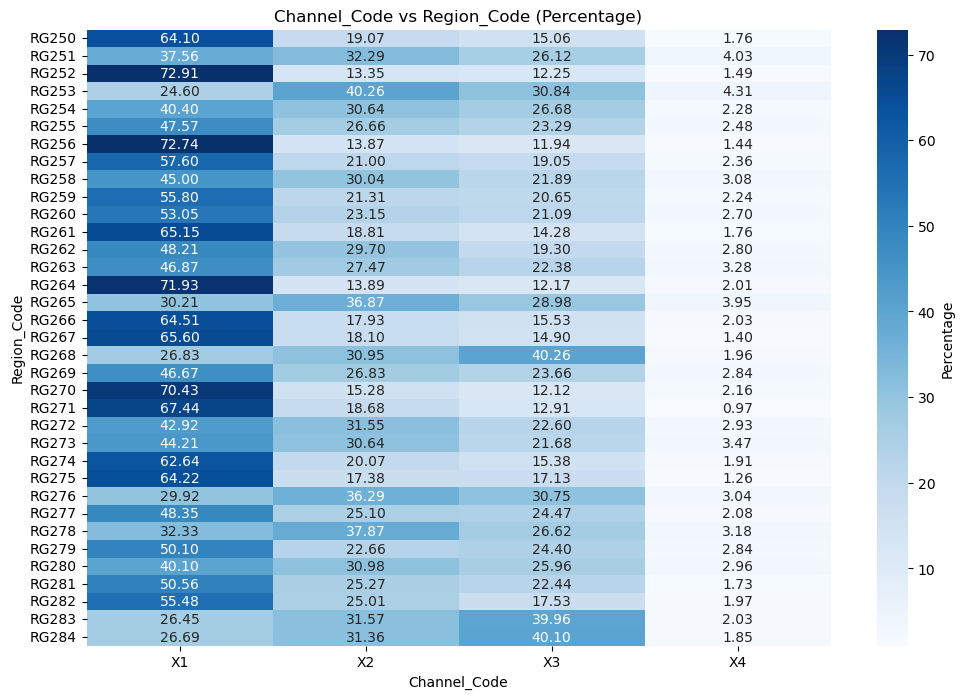

In [26]:
# Create a pivot table to show the percentage distribution of Channel_Code for each Region_Code
pivot_table = data.pivot_table(index='Region_Code', columns='Channel_Code', aggfunc='size', fill_value=0)
pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table_percentage, annot=True, cmap='Blues', fmt='.2f', cbar_kws={'label': 'Percentage'})
plt.title('Channel_Code vs Region_Code (Percentage)')
plt.xlabel('Channel_Code')
plt.ylabel('Region_Code')
plt.show()

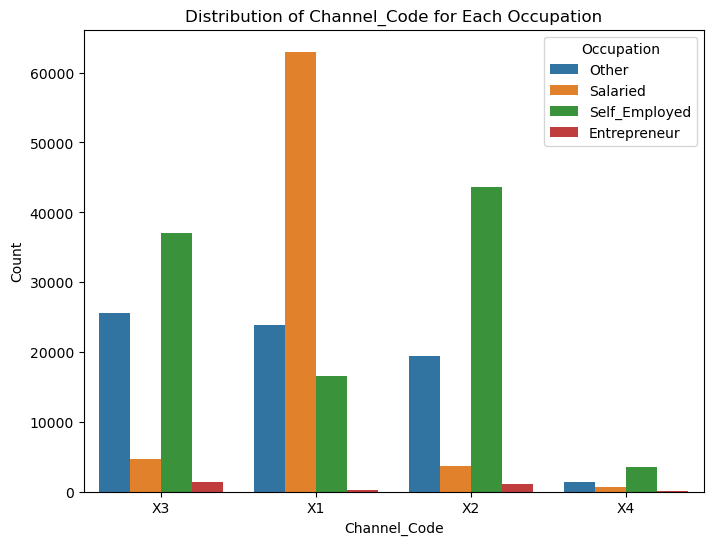

In [27]:
#Channel code vs Occupation
# Create a count plot to visualize the distribution of Channel_Code for each Occupation
plt.figure(figsize=(8, 6))
sns.countplot(x='Channel_Code', hue='Occupation', data=data)
plt.title('Distribution of Channel_Code for Each Occupation')
plt.xlabel('Channel_Code')
plt.ylabel('Count')
plt.legend(title='Occupation')
plt.show()


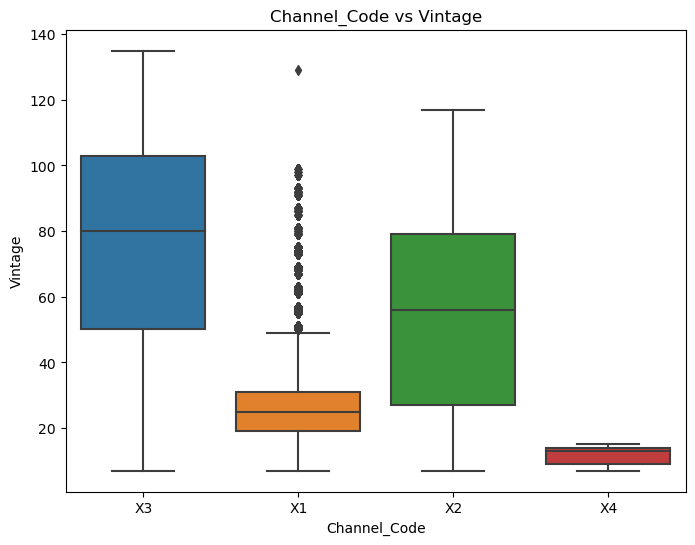

In [28]:
#Channel code vs Vintage
plt.figure(figsize=(8, 6))
sns.boxplot(x='Channel_Code', y='Vintage', data=data)
plt.title('Channel_Code vs Vintage')
plt.xlabel('Channel_Code')
plt.ylabel('Vintage')
plt.show()


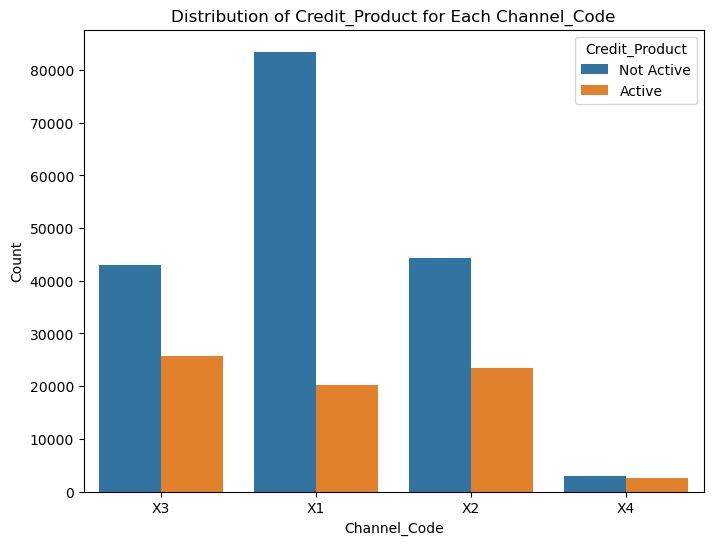

In [29]:
#Channel code vs Credit Product
plt.figure(figsize=(8, 6))
sns.countplot(x='Channel_Code', hue='Credit_Product', data=data)
plt.title('Distribution of Credit_Product for Each Channel_Code')
plt.xlabel('Channel_Code')
plt.ylabel('Count')
plt.legend(title='Credit_Product', labels=['Not Active', 'Active'])
plt.show()


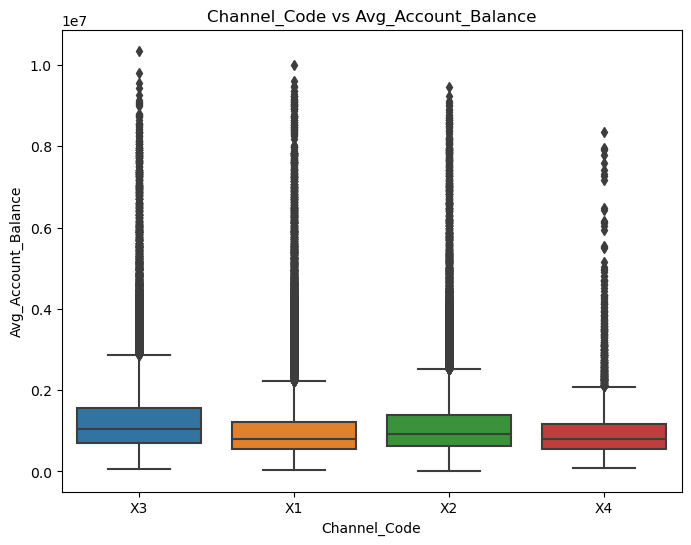

In [30]:
#Channel code vs Average Account Balance
plt.figure(figsize=(8, 6))
sns.boxplot(x='Channel_Code', y='Avg_Account_Balance', data=data)
plt.title('Channel_Code vs Avg_Account_Balance')
plt.xlabel('Channel_Code')
plt.ylabel('Avg_Account_Balance')
plt.show()


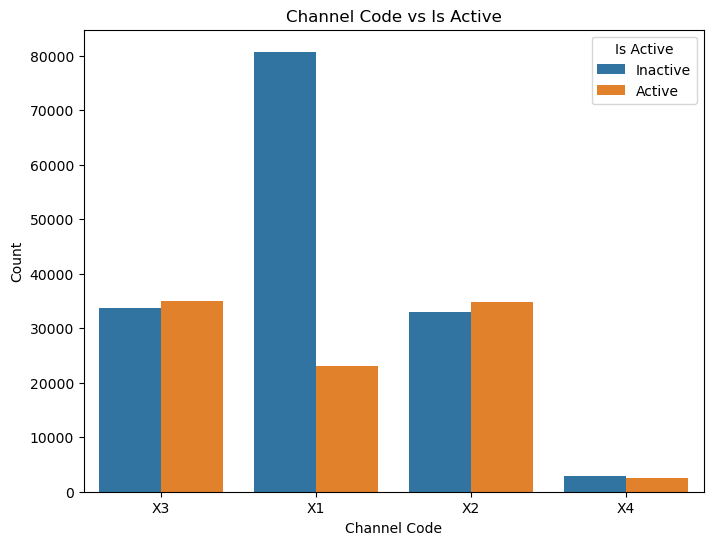

In [31]:
#Channel code vs Is Active
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Channel_Code', hue='Is_Active')
plt.title('Channel Code vs Is Active')
plt.xlabel('Channel Code')
plt.ylabel('Count')
plt.legend(title='Is Active', labels=['Inactive', 'Active'])
plt.show()

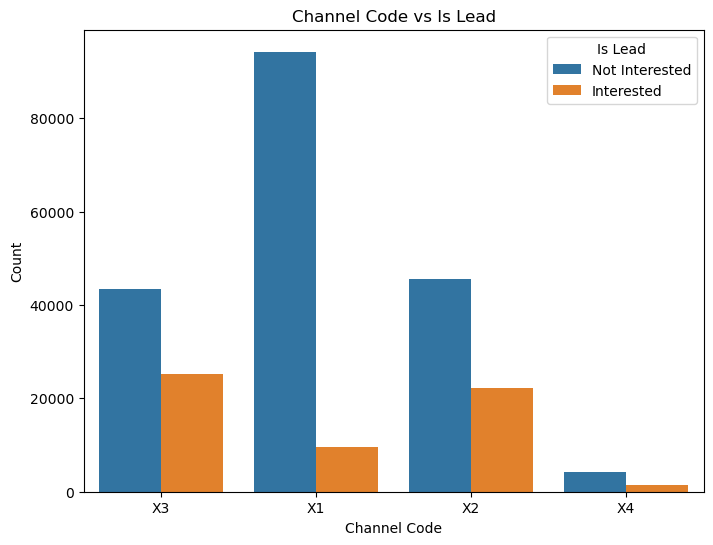

In [32]:
#Channel code vs Is Lead
import seaborn as sns
import matplotlib.pyplot as plt

# Stacked Bar Plot
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Channel_Code', hue='Is_Lead')
plt.title('Channel Code vs Is Lead')
plt.xlabel('Channel Code')
plt.ylabel('Count')
plt.legend(title='Is Lead', labels=['Not Interested', 'Interested'])
plt.show()


**3.CREDIT PRODUCT**

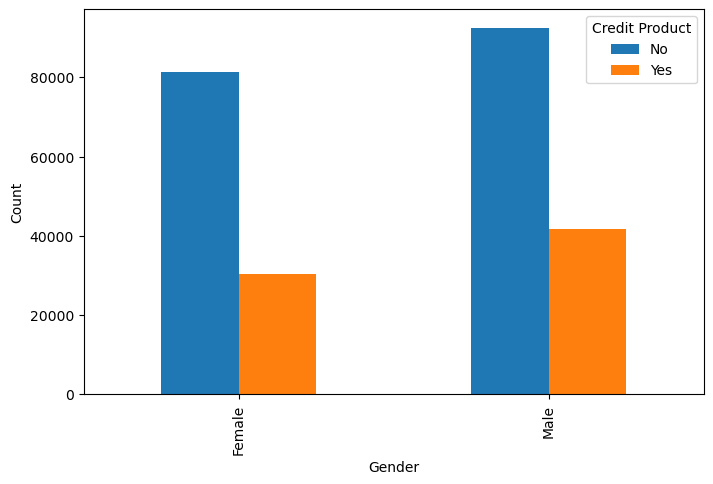

In [33]:
# Credit Product Vs Gender

# Create a contingency table with age groups
contingency_table = pd.crosstab(data['Gender'], data['Credit_Product'])

# Plot the contingency table
contingency_table.plot(kind='bar', figsize=(8, 5))
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Credit Product')
plt.show()

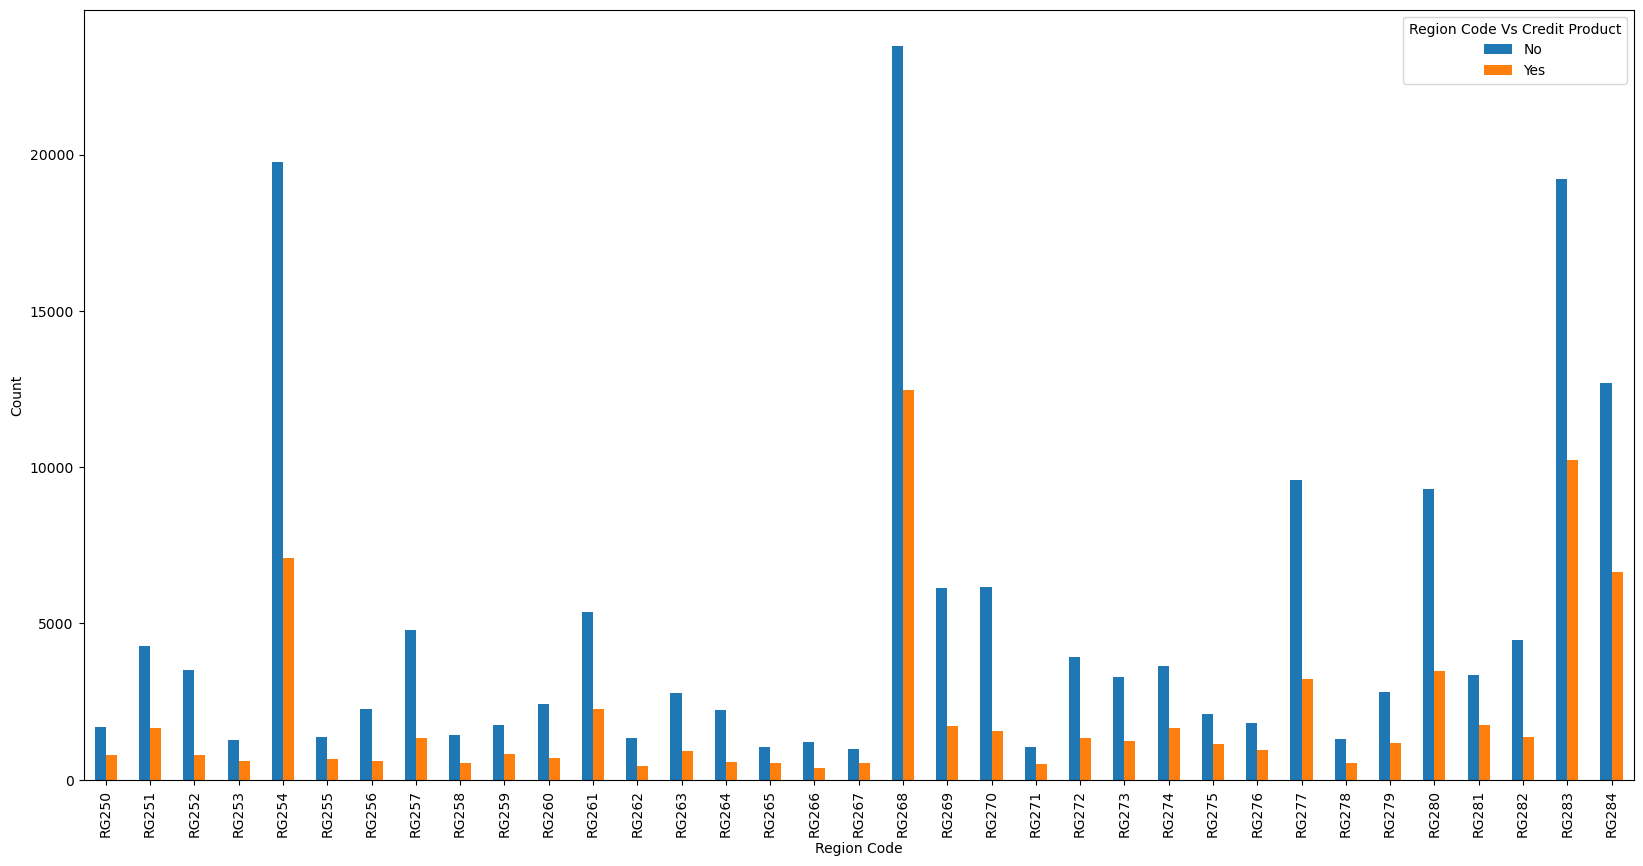

In [34]:
# Credit Product Vs Region_Code

contingency_table = pd.crosstab(data['Region_Code'], data['Credit_Product'])


# Plot the contingency table
contingency_table.plot(kind='bar', figsize=(20, 10))
plt.xlabel('Region Code')
plt.ylabel('Count')
plt.legend(title='Region Code Vs Credit Product')
plt.show()

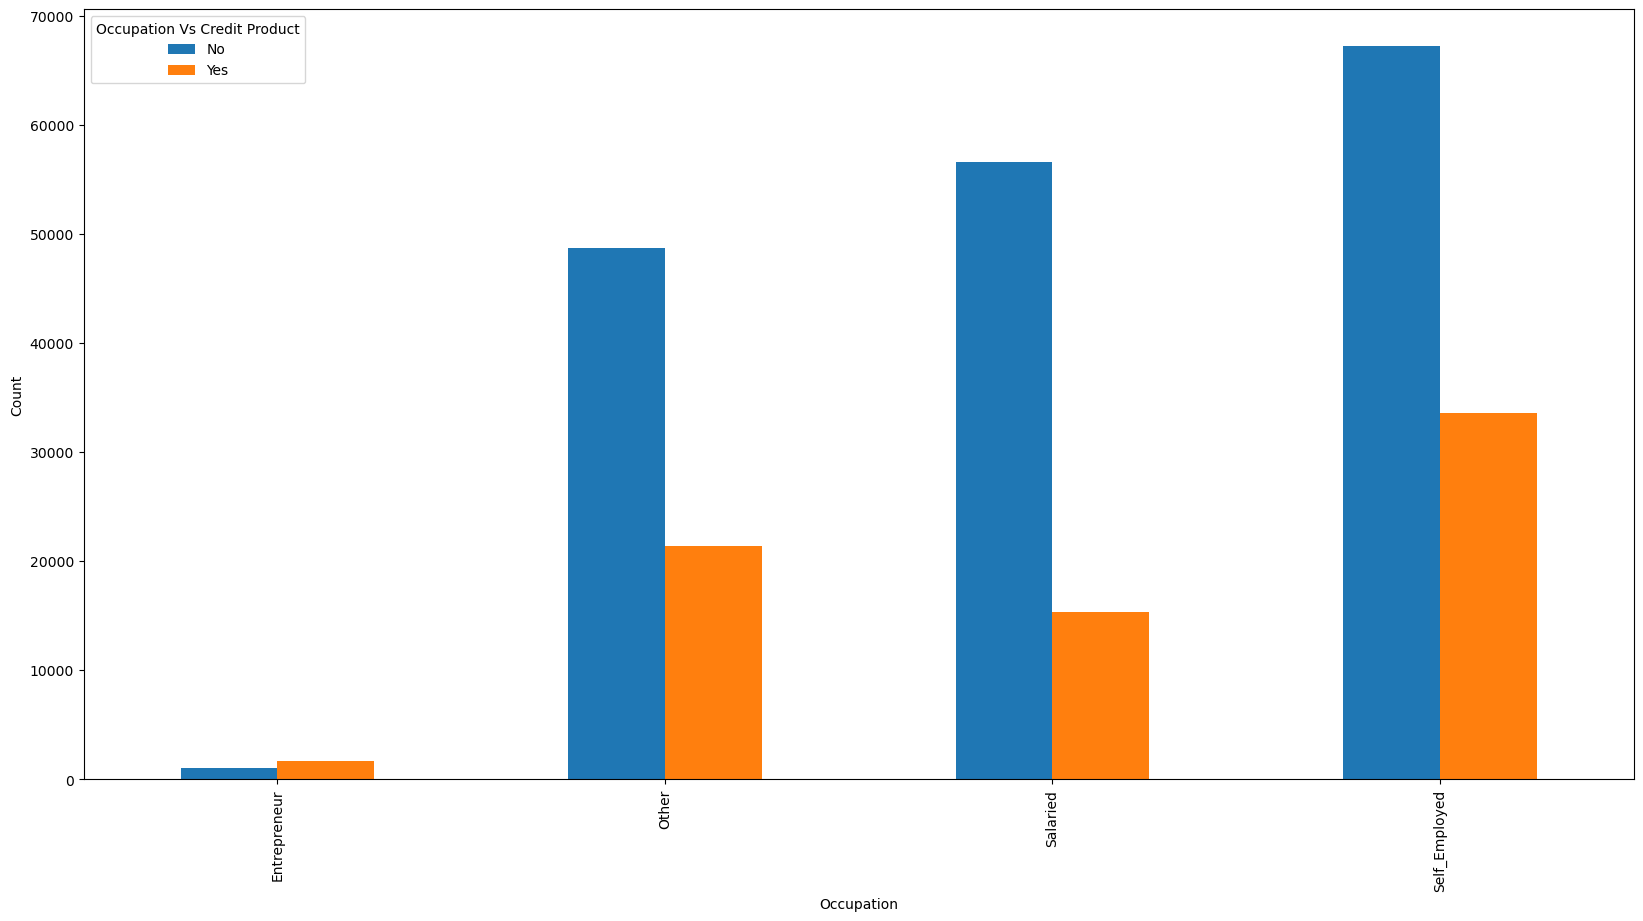

In [35]:
# Credit Product Vs Occupation

contingency_table = pd.crosstab(data['Occupation'], data['Credit_Product'])

# Plot the contingency table
contingency_table.plot(kind='bar', figsize=(20, 10))
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.legend(title='Occupation Vs Credit Product')
plt.show()

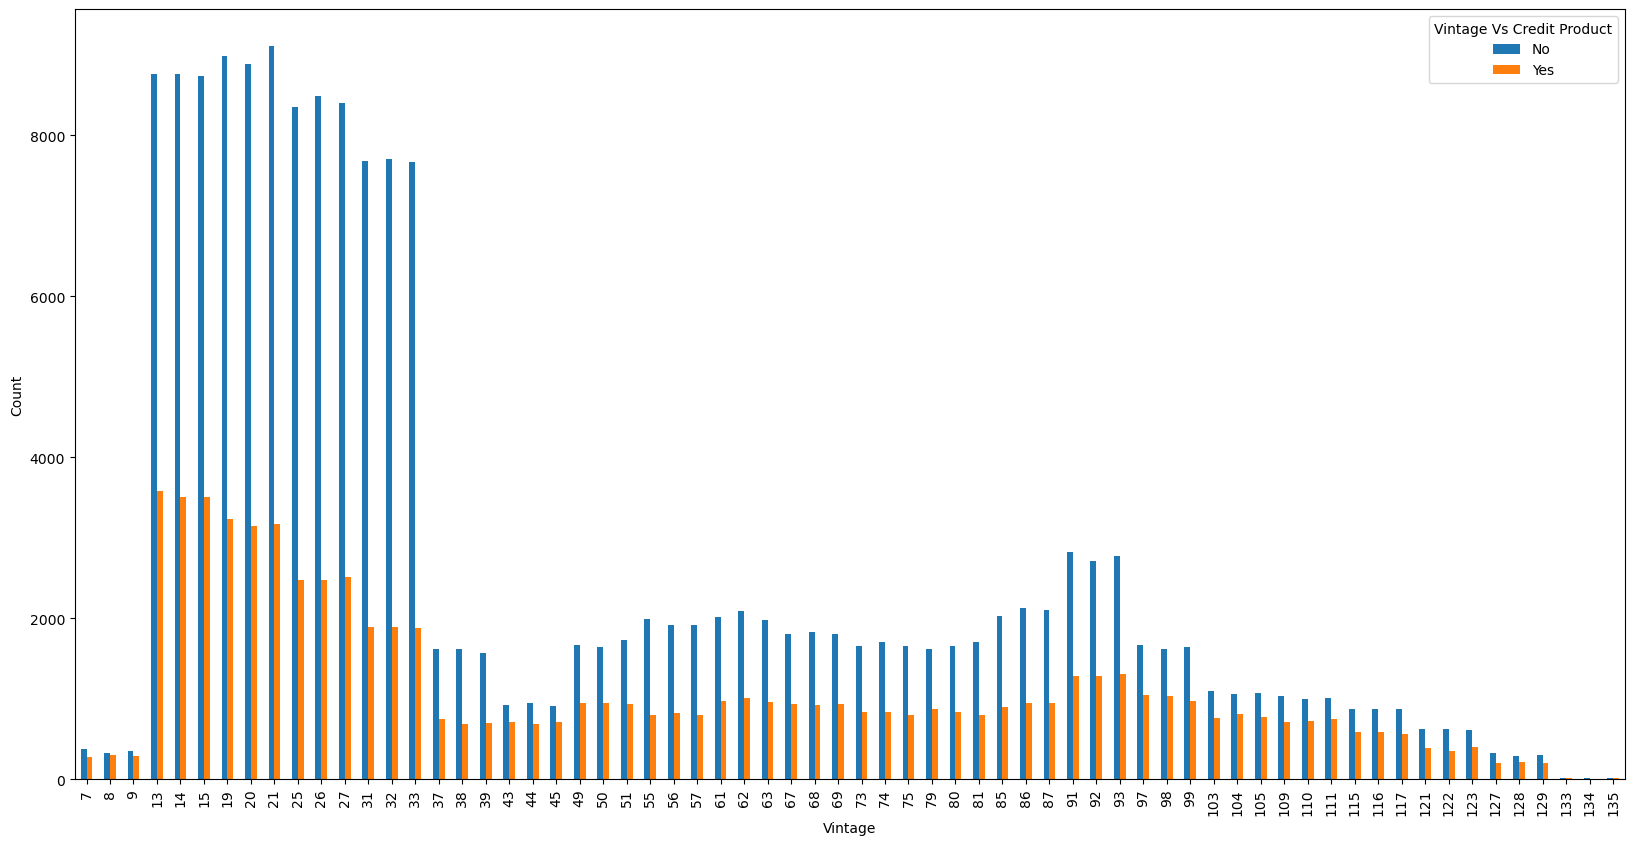

In [36]:
# Credit Product Vs Vintage

contingency_table = pd.crosstab(data['Vintage'], data['Credit_Product'])

# Plot the contingency table
contingency_table.plot(kind='bar', figsize=(20, 10))
plt.xlabel('Vintage')
plt.ylabel('Count')
plt.legend(title='Vintage Vs Credit Product')
plt.show()


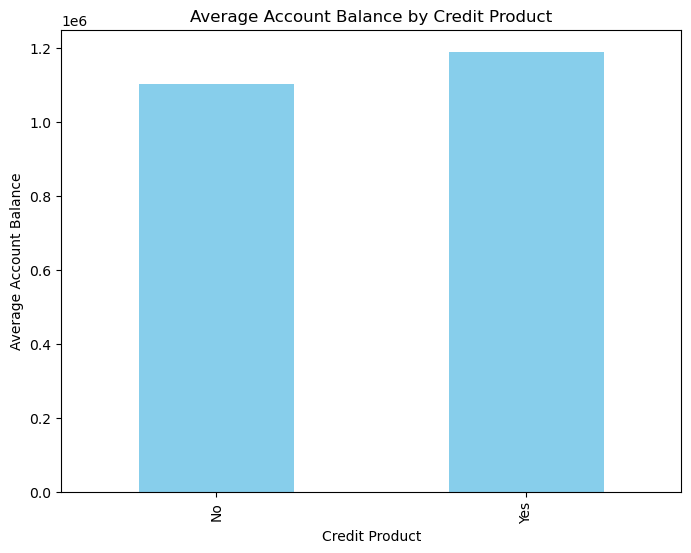

In [37]:
# Credit Product Vs Avg_Account_Balance

average_balance_by_product = data.groupby('Credit_Product')['Avg_Account_Balance'].mean()

# Create the plot
plt.figure(figsize=(8, 6))
average_balance_by_product.plot(kind='bar', color='skyblue')

# Add labels and title to the plot
plt.xlabel('Credit Product')
plt.ylabel('Average Account Balance')
plt.title('Average Account Balance by Credit Product')

# Display the plot
plt.show()

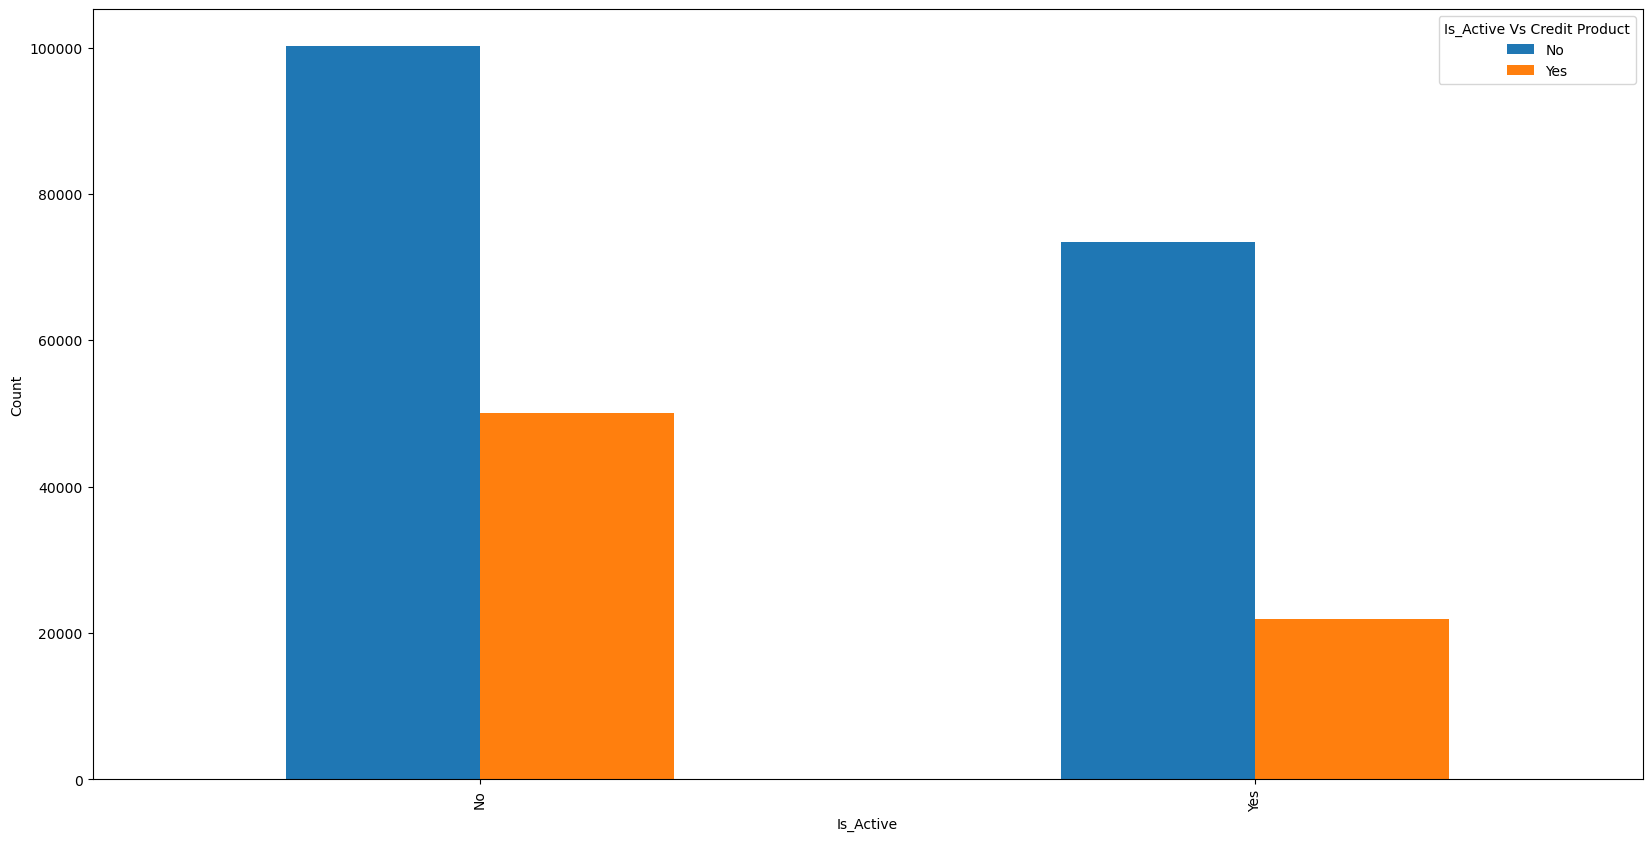

In [39]:
# Credit Product Vs Is_Active
contingency_table = pd.crosstab(data['Is_Active'], data['Credit_Product'])

# Plot the contingency table
contingency_table.plot(kind='bar', figsize=(20, 10))
plt.xlabel('Is_Active')
plt.ylabel('Count')
plt.legend(title='Is_Active Vs Credit Product')
plt.show()

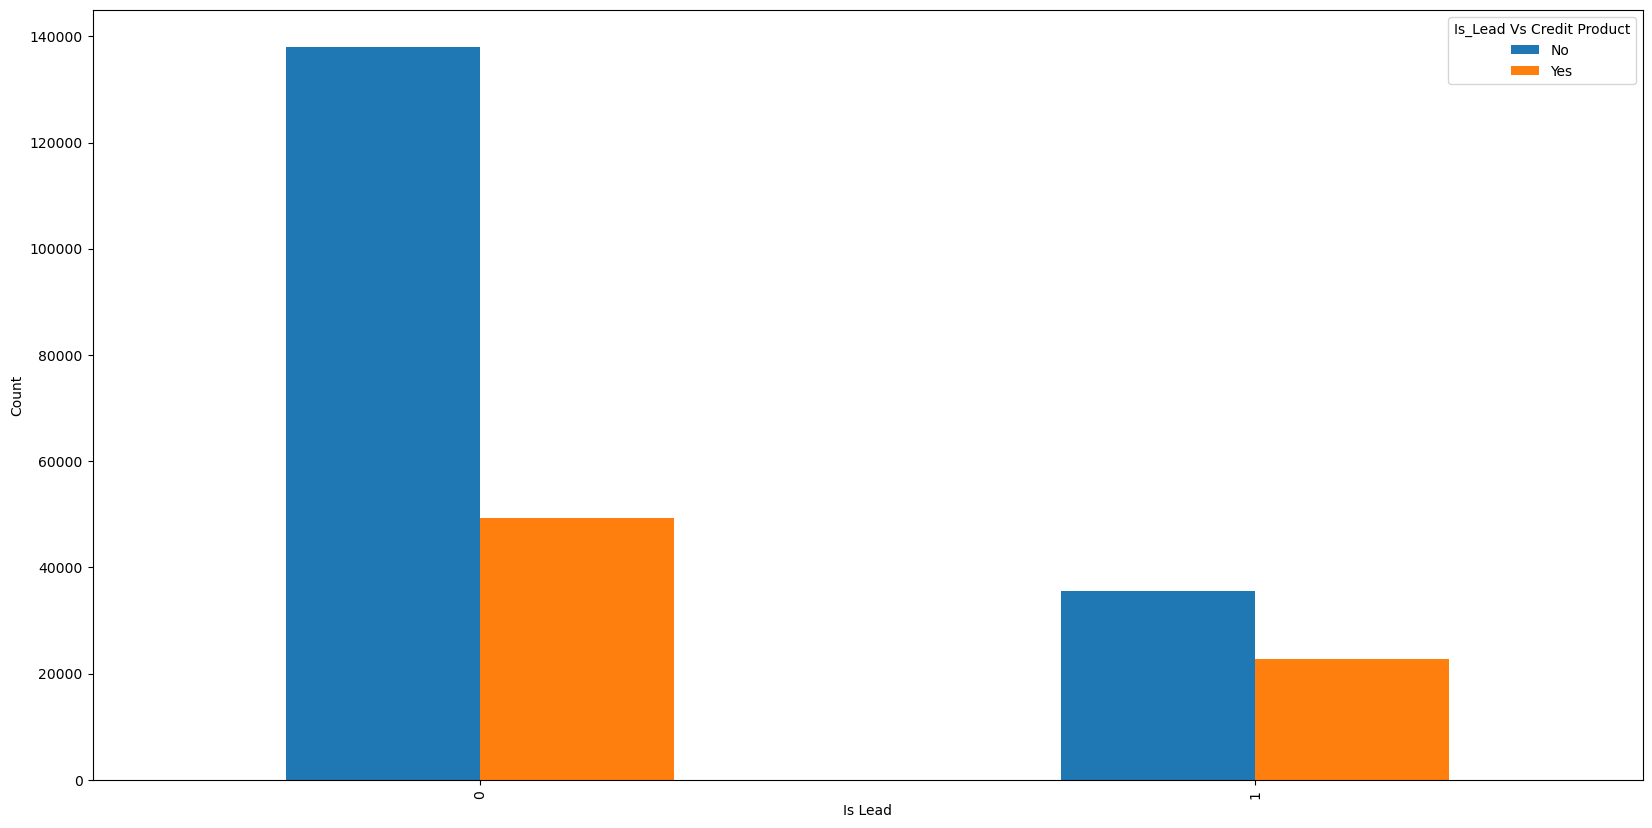

In [41]:
# Credit Product Vs Is_Lead
contingency_table = pd.crosstab(data['Is_Lead'], data['Credit_Product'])

# Plot the contingency table
contingency_table.plot(kind='bar', figsize=(20, 10))
plt.xlabel('Is Lead')
plt.ylabel('Count')
plt.legend(title='Is_Lead Vs Credit Product')
plt.show()